# Marine Traffic Scraping with requests, XHR and JSON

Target link : https://www.marinetraffic.com/en/ais/details/ships/shipid:371441/mmsi:310554000/imo:9312456/vessel:STENA_PERROS

# 1. Scraping the Latest position tab

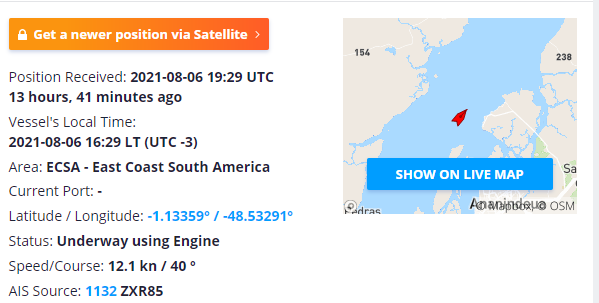

In [1]:
from IPython.display import Image
Image(filename="img1.png")

### 1.1. Website inspection with Chrome Dev Tools

The goal is to scrape the possible data using the **requests** library and intercepting the **XmlHttpRequest(XHR)** communications between the website and its server.  
The data is usually formatted in json specially with websites having APIs endpoints.

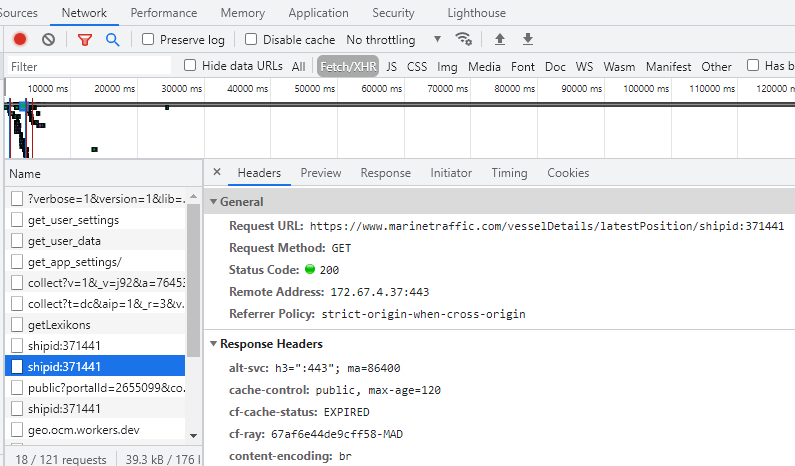

In [2]:
from IPython.display import Image
Image(filename="img2.png")

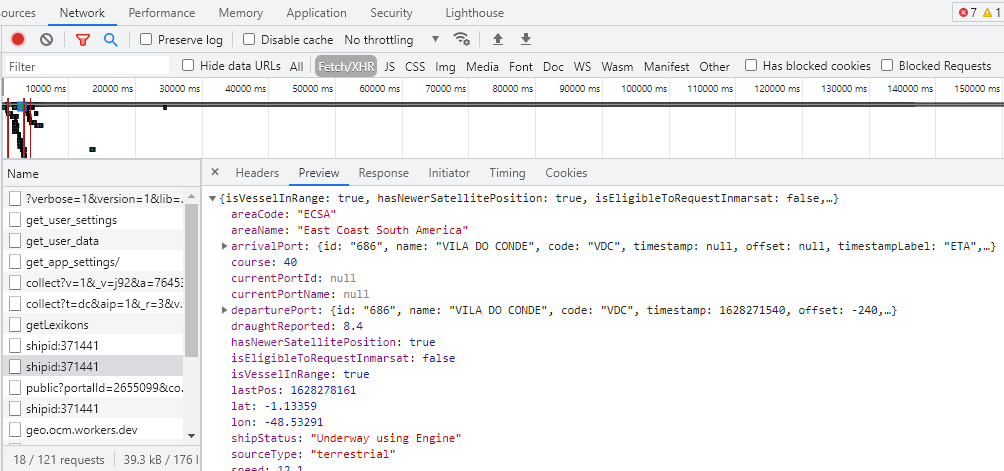

In [3]:
from IPython.display import Image
Image(filename="img3.png")

By inspecting our XHR links, headers & previews, we can see that the data fetched through :"https://www.marinetraffic.com/vesselDetails/latestPosition/shipid:371441" gives the information targeted in the first picture in a json format.  
So let's scrape this part first.

### 1.2. Code

In [6]:
import pandas as pd
import requests
from datetime import datetime

In [9]:
# fetch the json formatted data
def get_ship_position(ship_id):

    url = "https://www.marinetraffic.com/vesselDetails/latestPosition/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()


def main():    

    data = get_ship_position("371441")
    #print(data)
    ts = datetime.utcfromtimestamp(data["lastPos"])
    #print("Last known position: {} / {} @ {}".format(data["lat"], data["lon"], ts))
    #print("Speed : ",data['speed'])
    #print("Status : ",data['shipStatus'])
    #print("Area : ",data['areaCode'])
    #print("Area Name : ",data['areaName'])
    s = pd.Series(data)
    print(s)


    return 0


main()

isVesselInRange                                                             True
hasNewerSatellitePosition                                                   True
isEligibleToRequestInmarsat                                                False
areaName                                                East Coast South America
areaCode                                                                    ECSA
course                                                                        40
lastPos                                                               1628278161
timezoneOffset                                                              -180
lat                                                                     -1.13359
lon                                                                     -48.5329
shipStatus                                                 Underway using Engine
speed                                                                       12.1
stationId                   

0

# 2. Scraping the Vessel infos

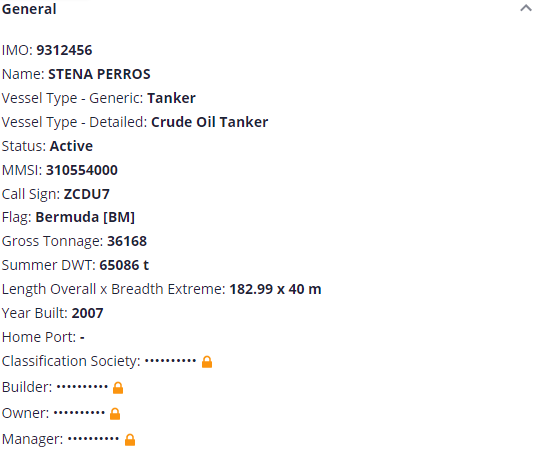

In [12]:
from IPython.display import Image
Image(filename="img6.png")

### 2.1. Website inspection with Chrome Dev Tools

We use the same tools and logic to scrape the general vessel informations 

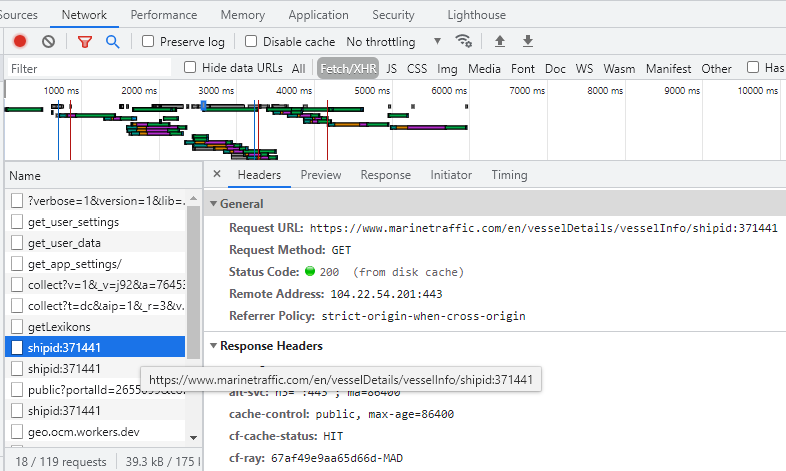

In [13]:
from IPython.display import Image
Image(filename="img4.png")

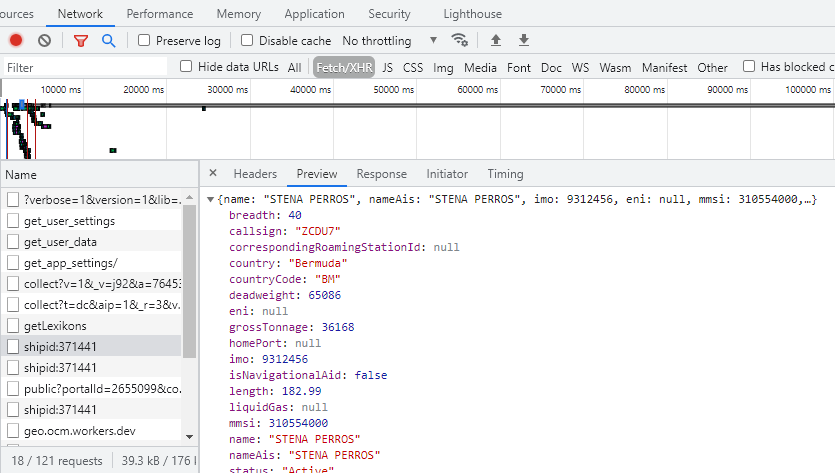

In [14]:
from IPython.display import Image
Image(filename="img5.png")

For this one though the target link is : "https://www.marinetraffic.com/en/vesselDetails/vesselInfo/shipid:371441"

### 2.2. Code 

In [17]:
def get_ship_info(ship_id):

    url ="https://www.marinetraffic.com/en/vesselDetails/vesselInfo/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()


def main():


    data = get_ship_info("371441")
    #print(data)

    import pandas as pd

    s = pd.Series(data)
    print(s)

    return 0


main()


name                                 STENA PERROS
nameAis                              STENA PERROS
imo                                       9312456
eni                                          None
mmsi                                    310554000
callsign                                    ZCDU7
country                                   Bermuda
countryCode                                    BM
type                                       Tanker
typeSpecific                     Crude Oil Tanker
typeColor                                       8
grossTonnage                                36168
deadweight                                  65086
teu                                          None
liquidGas                                    None
length                                     182.99
breadth                                        40
yearBuilt                                    2007
status                                     Active
isNavigationalAid                           False


0

# 3. Voyage Info

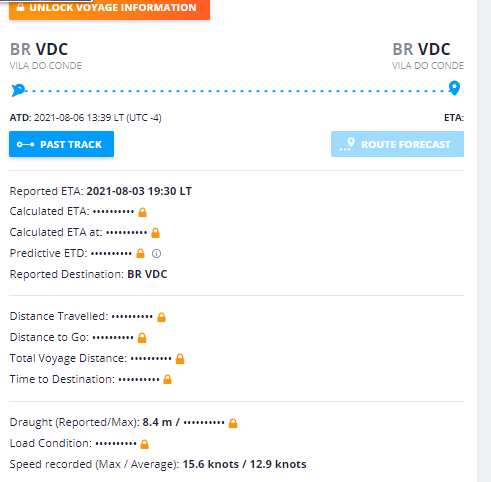

In [19]:
from IPython.display import Image
Image(filename="img7.png")

### 3.1. Website inspection with Chrome Dev Tools

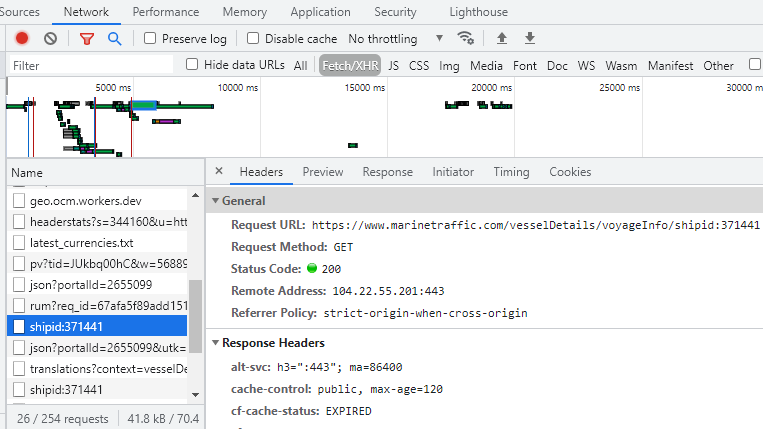

In [20]:
from IPython.display import Image
Image(filename="img8.png")

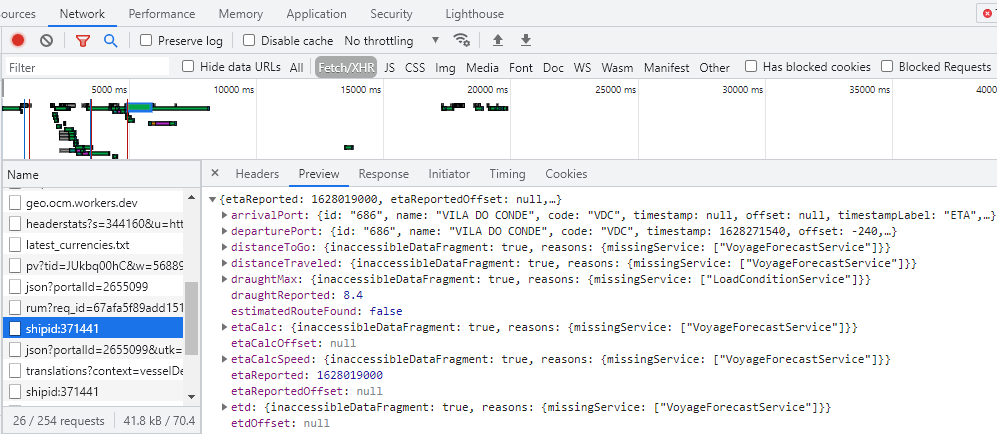

In [21]:
from IPython.display import Image
Image(filename="img9.png")

"https://www.marinetraffic.com/vesselDetails/voyageInfo/shipid:371441" Will be here our target link.

### 3.2. Code

In [24]:
def get_ship_voyage(ship_id):

    url ="https://www.marinetraffic.com/vesselDetails/voyageInfo/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()


def main():

    data = get_ship_voyage("371441")
    #print(data)

    import pandas as pd

    s = pd.Series(data)
    print(s)

    return 0


main()


etaReported                                                                1628019000
etaReportedOffset                                                                None
etaCalc                             {'inaccessibleDataFragment': True, 'reasons': ...
etaCalcOffset                                                                    None
etaCalcSpeed                        {'inaccessibleDataFragment': True, 'reasons': ...
etd                                 {'inaccessibleDataFragment': True, 'reasons': ...
etdOffset                                                                        None
reportedDestination                                                            BR VDC
distanceTraveled                    {'inaccessibleDataFragment': True, 'reasons': ...
distanceToGo                        {'inaccessibleDataFragment': True, 'reasons': ...
progress                                                                     -2.62176
departurePort                       {'id': '686', 'nam

0

# 4. Code Summary

In [40]:
import pandas as pd
import requests
from datetime import datetime

# fetch Vessel infos
def get_ship_info(ship_id):

    url ="https://www.marinetraffic.com/en/vesselDetails/vesselInfo/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()

#fetch voyage infos
def get_ship_voyage(ship_id):

    url ="https://www.marinetraffic.com/vesselDetails/voyageInfo/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()

# fetch vessel position data
def get_ship_position(ship_id):

    url = "https://www.marinetraffic.com/vesselDetails/latestPosition/shipid:{}".format(ship_id)

    headers = {
        "accept": "application/json",
        "accept-encoding": "gzip, deflate",
        "user-agent": "Mozilla/5.0",
        "x-requested-with": "XMLHttpRequest"
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    return response.json()





def main():


    info = get_ship_info("371441")
    voyage = get_ship_voyage("371441")
    position = get_ship_position("371441")   


    print("\n\n Info : ### \n",pd.Series(info))
    print("\n\n Voyage : ### \n",pd.Series(voyage))
    print("\n\n Position : ### \n",pd.Series(position))
    
    
    
    return 0


main()





 Info : ### 
 name                                 STENA PERROS
nameAis                              STENA PERROS
imo                                       9312456
eni                                          None
mmsi                                    310554000
callsign                                    ZCDU7
country                                   Bermuda
countryCode                                    BM
type                                       Tanker
typeSpecific                     Crude Oil Tanker
typeColor                                       8
grossTonnage                                36168
deadweight                                  65086
teu                                          None
liquidGas                                    None
length                                     182.99
breadth                                        40
yearBuilt                                    2007
status                                     Active
isNavigationalAid                 

0